In [1]:
#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### 1. Load the dataset

In [2]:
df = pd.read_csv("AmazonRatings")

In [3]:
df.head()

,userID,productID,rating
0,20,4391,4.0
1,20,4391,4.0
2,946,2883,5.0
3,946,2883,5.0
4,4622,1491,5.0


In [4]:
df.dtypes

userID         int64
productID      int64
rating       float64
dtype: object

In [6]:
#Summary statistics of rating variable
df['rating'].describe().transpose()

count    50000.000000
mean         4.297000
std          1.143843
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [7]:
df.shape

(50000, 3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
userID       50000 non-null int64
productID    50000 non-null int64
rating       50000 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


In [14]:
#Summary statistics of rating variable
df['rating'].describe().transpose()

count    50000.000000
mean         4.297000
std          1.143843
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [15]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df.rating.min()))
print('Maximum rating is: %d' %(df.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [16]:
#Check for missing values
print('Number of missing values across columns: \n',df.isnull().sum())

Number of missing values across columns: 
 userID       0
productID    0
rating       0
dtype: int64


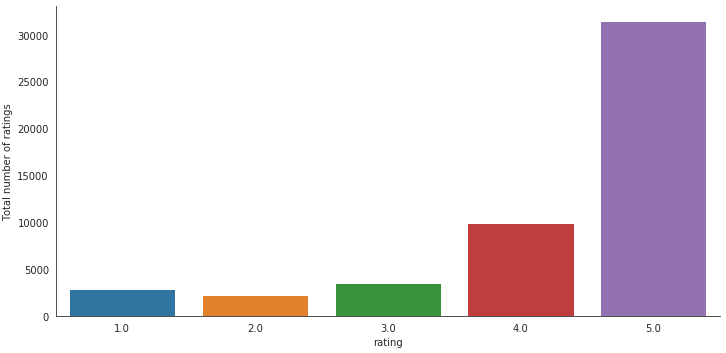

In [17]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

<Figure size 432x288 with 0 Axes>

(array([ 2885.,  2223.,  3510.,  9921., 31461.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Frequency')

[0, 5, 0, 50000]

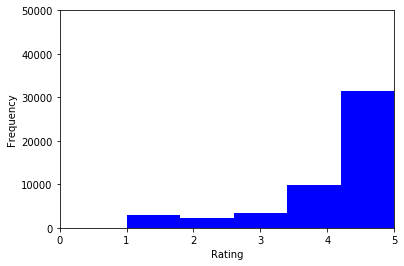

In [95]:
# frequency of each rating in a histogram
plt.figure(1)
plt.hist(df['rating'],5, facecolor='b')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axis([0, 5, 0, 50000])
plt.show()

<Figure size 432x288 with 0 Axes>

([<matplotlib.patches.Wedge at 0x136d94310>,
 [Text(-0.9563116330628311, 0.5435697383673059, 'rating of 1'),
  Text(-1.07895659492622, 0.21413235688521434, 'rating of 2'),
  Text(-1.0851867012790284, -0.17991615649279794, 'rating of 3'),
  Text(-0.5867291209231271, -0.9304563066908488, 'rating of 4'),
  Text(0.9823597475744156, 0.49494376079058794, 'rating of 5')],
 [Text(-0.5216245271251806, 0.29649258456398503, '5.8%'),
  Text(-0.5885217790506654, 0.11679946739193509, '4.4%'),
  Text(-0.59192001887947, -0.09813608535970796, '7.0%'),
  Text(-0.32003406595806927, -0.507521621831372, '19.8%'),
  Text(0.5358325895860447, 0.2699693240675934, '62.9%')])

(-1.1028917101987197,
 1.1045079125571977,
 -1.1120368664735811,
 1.1135926967334893)

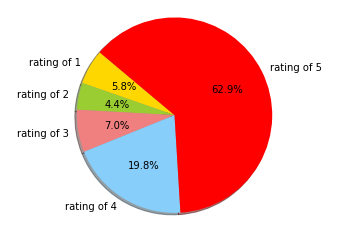

In [93]:
# percentage of each rating in a pie chart
plt.figure(2)
labels = 'rating of 1', 'rating of 2' ,'rating of 3', 'rating of 4','rating of 5'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
plt.pie(df.groupby('rating').size(),labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### 2. Taking the subset of dataset to make it less sparse/ denser 

In [18]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', df['userID'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', df['productID'].nunique())

Number of unique users in Raw data =  21678
Number of unique product in Raw data =  8852


In [39]:
#Check the top 10 users based on ratings
most_rated=df.groupby('userID').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 userID
0    145
1     43
2     43
3     40
4     38
5     38
6     36
7     33
8     33
9     32
dtype: int64


### 3. ratings analysis in final dataset

In [20]:
counts = df.userID.value_counts()
df_final = df[df.userID.isin(counts[counts>=10].index)]
print('Number of users who have rated 25 or more items =', len(df_final))
print('Number of unique users in the final data = ', df_final['userID'].nunique())
print('Number of unique products in the final data = ', df_final['userID'].nunique())

Number of users who have rated 25 or more items = 4617
Number of unique users in the final data =  319
Number of unique products in the final data =  319


In [35]:
#constructing the pivot table
final_ratings_matrix = df_final.pivot_table(index = 'userID', columns ='productID', values = 'rating').fillna(0)
final_ratings_matrix.head(10)

productID,0,1,2,3,4,5,6,7,8,9,...,8635,8637,8659,8691,8719,8736,8791,8799,8824,8828
userID,,,,,,,,,,,,,,,,,,,,,
0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (319, 1851)


In [37]:
#Calucating the density of the rating marix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  2914
possible_num_of_ratings =  590469
density: 0.49%


### 4. Splitting the data

In [40]:
counts = df.userID.value_counts()
df_final = df[df.userID.isin(counts[counts>=10].index)]
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(df_final, test_size = 0.3, random_state=0)
train_data.head()

,userID,productID,rating
2838,81,1936,1.0
375,17,640,5.0
1130,62,138,2.0
1348,132,560,1.0
8366,177,3278,5.0


In [41]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (3231, 3)
Shape of testing data:  (1386, 3)


### 5. Building Collaborative Filtering recommender model

In [42]:
df_cf = pd.concat([train_data, test_data]).reset_index()
df_cf.head()

,index,userID,productID,rating
0,2838,81,1936,1.0
1,375,17,640,5.0
2,1130,62,138,2.0
3,1348,132,560,1.0
4,8366,177,3278,5.0


In [46]:
# Matrix with row per 'user' and column per 'item' 
pivot_df = df_cf.pivot_table(index = 'userID', columns ='productID', values = 'rating').fillna(0)
pivot_df.head()

productID,0,1,2,3,4,5,6,7,8,9,...,8635,8637,8659,8691,8719,8736,8791,8799,8824,8828
userID,,,,,,,,,,,,,,,,,,,,,
0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (319, 1851)


In [48]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productID,0,1,2,3,4,5,6,7,8,9,...,8637,8659,8691,8719,8736,8791,8799,8824,8828,user_index
userID,,,,,,,,,,,,,,,,,,,,,
0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [49]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

productID,0,1,2,3,4,5,6,7,8,9,...,8635,8637,8659,8691,8719,8736,8791,8799,8824,8828
user_index,,,,,,,,,,,,,,,,,,,,,
0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6. Singular Value Decomposition

In [50]:
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)

In [51]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[ 8.38070768e-02  4.40838630e-02  2.26388606e-02 ...  3.35342898e-02
   2.01202701e-01  9.40551662e-01]
 [ 7.54097940e-02  9.48300344e-02  3.37508988e-02 ... -1.66454683e-01
  -3.19682323e-01  4.66595558e-02]
 [ 1.95292833e-02 -2.57853687e-02  6.74558173e-03 ...  7.86313412e-01
  -3.28411699e-01  2.16597695e-02]
 ...
 [-8.64254396e-04  5.02468451e-02  1.23414200e-03 ... -5.59734340e-03
  -2.51297993e-02  4.01579006e-03]
 [-9.11374959e-03 -2.32851422e-02  1.15471750e-02 ... -1.22492511e-02
  -5.03140340e-02  5.39198471e-03]
 [-1.79747586e-02 -1.78770659e-02  1.33191755e-02 ... -6.58886579e-03
  -5.24756589e-03  2.40277827e-02]]


In [52]:
print('Sigma: \n',sigma)

Sigma: 
 [22.90551347 23.7378883  23.82262359 24.06278094 24.61031316 25.22986259
 26.39591028 27.56188392 29.06464405 36.54132816]


In [53]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[22.90551347  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         23.7378883   0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         23.82262359  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         24.06278094  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         24.61031316  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         25.22986259
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  26.39591028  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         27.56188392  0.          0.        ]
 [ 0.          0.          0.        

In [54]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[-7.38429437e-02  1.60259739e-01 -2.03549977e-02 ... -8.86899751e-05
  -8.77227024e-03  1.64610573e-02]
 [-7.39025273e-02 -4.84717991e-02 -6.29260756e-04 ...  8.74205092e-05
  -1.49961387e-03  1.99744040e-02]
 [ 5.01445623e-02  1.69534421e-01 -7.37509010e-05 ...  2.13861666e-04
   3.95008639e-03  7.08379130e-03]
 ...
 [-3.37490511e-02 -2.19073946e-01 -4.29787124e-06 ... -1.31845163e-05
   3.11023516e-04 -3.01965359e-02]
 [-4.24190822e-02 -3.30638736e-01 -2.23593770e-04 ... -3.52367056e-05
  -2.02108461e-03 -5.49950522e-02]
 [ 9.76017139e-02  3.87029769e-02  4.89744034e-03 ...  2.68775506e-06
   2.67928918e-04  6.38449095e-03]]


In [55]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

productID,0,1,2,3,4,5,6,7,8,9,...,8635,8637,8659,8691,8719,8736,8791,8799,8824,8828
0,3.143336,-0.103964,0.120401,2.915172,-0.093669,-0.381222,-0.336933,0.998358,2.207340,-0.095660,...,0.055833,-0.004416,-0.000102,-0.009959,-0.036101,-0.021609,-0.044235,-0.000152,-0.023453,-0.124403
1,0.380384,-0.861100,-0.012223,-1.319240,0.911685,5.452473,-0.559471,-0.080041,10.374510,-0.087133,...,0.049698,-0.002946,0.000118,0.019142,0.230188,-0.014092,-0.095114,-0.000214,-0.032226,2.103710
2,-0.419201,-0.247343,0.000354,-0.606667,0.043042,0.540779,6.131249,0.703151,-0.343315,0.099429,...,0.040254,-0.001049,0.000545,0.001901,-0.004830,0.181208,3.763112,0.000068,0.023603,-0.095114
3,-0.494749,-1.093559,-0.045504,-0.008519,0.513945,1.072906,-0.418330,0.423152,-0.047023,0.757847,...,0.037127,0.020422,0.000894,0.035520,0.048843,-0.011097,-0.103464,0.000773,0.003689,-0.159439
4,-0.555597,1.708074,0.056341,-1.358472,-0.029340,-0.598361,3.545854,-0.014842,0.187890,-1.368866,...,0.298937,0.250911,-0.000781,-0.106437,-0.082208,-0.052547,0.125242,-0.002191,-0.031449,0.193201


In [79]:
def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    return temp

In [57]:
userID = 4
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
5                           0.0          1.072906
331                         0.0          0.841992
9                           0.0          0.757847
302                         0.0          0.746830
140                         0.0          0.741225


In [58]:
userID = 6
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 6):

                   user_ratings  user_predictions
Recommended Items                                
20                          0.0          1.451944
59                          0.0          1.329621
67                          0.0          1.282755
56                          0.0          1.117758
477                         0.0          0.967925


In [59]:
userID = 8
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 8):

                   user_ratings  user_predictions
Recommended Items                                
59                          0.0          0.960353
336                         0.0          0.849380
264                         0.0          0.695460
447                         0.0          0.637629
458                         0.0          0.637629


### 7. Evaluation of Collabrative recommendation model

In [60]:
# Actual ratings given by the users
final_ratings_matrix.head()

productID,0,1,2,3,4,5,6,7,8,9,...,8635,8637,8659,8691,8719,8736,8791,8799,8824,8828
userID,,,,,,,,,,,,,,,,,,,,,
0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

productID
0    0.084639
1    0.285266
2    0.043887
3    0.288401
4    0.068966
dtype: float64

In [62]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(1851, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productID,,,
0,0.084639,0.083493,0
1,0.285266,0.293694,1
2,0.043887,0.009450,2
3,0.288401,0.361690,3
4,0.068966,0.057133,4


In [63]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.01482 



### 8. Getting top - K ( K = 25) recommendations for user = 9

In [89]:
# Enter 'userID' and 'num_recommendations' for the user #9
userID = 300
num_recommendations = 25
result = recommend_items(userID, pivot_df, preds_df, num_recommendations)

In [90]:
print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
print(result.head(num_recommendations))


Below are the recommended items for user(user_id = 300):

                   user_ratings  user_predictions
Recommended Items                                
3                           0.0          0.557182
336                         0.0          0.347973
8                           0.0          0.314784
458                         0.0          0.251676
447                         0.0          0.251676
17                          0.0          0.243688
16                          0.0          0.243688
154                         0.0          0.243229
6                           0.0          0.238003
45                          0.0          0.228647
46                          0.0          0.228647
810                         0.0          0.211842
50                          0.0          0.209706
133                         0.0          0.207774
128                         0.0          0.196946
5                           0.0          0.185776
656                         0.0          

([array([1.523e+03, 2.920e+02, 2.500e+01, 2.000e+00, 1.000e+00]),
  array([1843.,    0.,    0.,    0.,    0.])],
 array([-0.10402581,  0.02821582,  0.16045744,  0.29269907,  0.4249407 ,
         0.55718232]),
 <a list of 2 Lists of Patches objects>)

Text(0.5, 1.0, 'Actual vs. Predicted ratings')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Frequency')

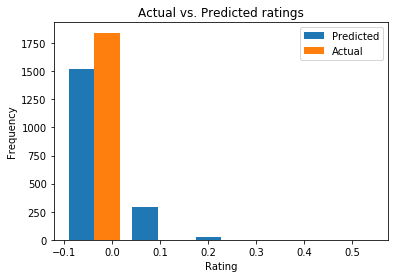

In [104]:
#Plot comparing ratings
x = result['user_predictions']
y = result['user_ratings']
data = np.vstack([x, y]).T
plt.hist(data, bins=5, alpha=1, label=['Predicted', 'Actual'])
plt.legend(loc='upper right')

plt.title("Actual vs. Predicted ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()